# MNIST met beslissingsbomen

We gaan nu kijken hoe goed beslissingsbomen presteren op de MNIST dataset. We gebruiken hiervoor de `DecisionTreeClassifier` uit `sklearn.tree`.


## Importeren van de data

We downloaden de data met de `fetch_openml` functie uit `sklearn.datasets`. Deze functie downloadt de data en zet het in een Pandas dataframe. We kunnen de data dus direct gebruiken. Met `shape` bekijken we de dimensies van deze dataset.

In [1]:
# load the MNIST dataset from sklearn
from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784', return_X_y=True, parser='auto')
print(f'X shape: {X.shape} , y shape: {y.shape}')

X shape: (70000, 784) , y shape: (70000,)


## Splitsen van de data in een train en test set

We hebben dus 70000 afbeeldingen die alle bestaan uit 784 pixelwaarden.  We splitsen de data in een train en test set met de `train_test_split` functie uit `sklearn.model_selection`. We gebruiken 20% van de data als test set. We houden dus 56000 afbeeldingen over om de beslissingsboom te trainen. Deze afbeeldingen worden opgeslagen in `X_train`. De labels van deze afbeeldingen worden opgeslagen in `y_train`. De overige 14000 afbeeldingen worden opgeslagen in `X_test` en de labels in `y_test`.

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Visualiseren van de data

We kunnen de eerste 10 afbeeldingen bekijken met de `head` functie van Pandas. We zien dat de pixelwaarden genormaliseerd zijn naar een waarde tussen 0 en 255.

De labels zijn de getallen die op de afbeeldingen staan. We kunnen de eerste 10 afbeeldingen met de labels bekijken met de `head` functie van Pandas.

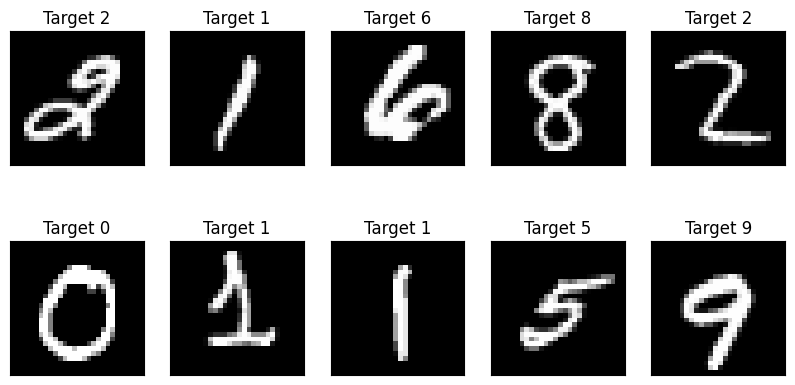

In [4]:
# print the first 10 images
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 5, figsize=(10, 5), subplot_kw={'xticks': (), 'yticks': ()})

for ax, X, y in zip(axes.ravel(), X_train.head(10).to_numpy(), y_train.head(10)):
    ax.imshow(X.reshape(28, 28), cmap=plt.cm.gray)
    ax.set_title(f'Target {y}')

## Trainen van de beslissingsboom

We gebruiken de `DecisionTreeClassifier` uit `sklearn.tree`. We trainen de beslissingsboom met de `fit` functie. We geven de train data en de labels van de train data mee als argumenten. Omdat het over veel data gaat, duurt het trainen van de beslissingsboom iets langer.

In [13]:
from sklearn.tree import DecisionTreeClassifier

# train the model
model = DecisionTreeClassifier(max_depth=19)
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=19)

## Visualiseren van de beslissingsboom

De volledige beslissingsboom is te groot om helemaal te visualiseren. Daarom beperken we de plot van de boom tot een diepte van 3.

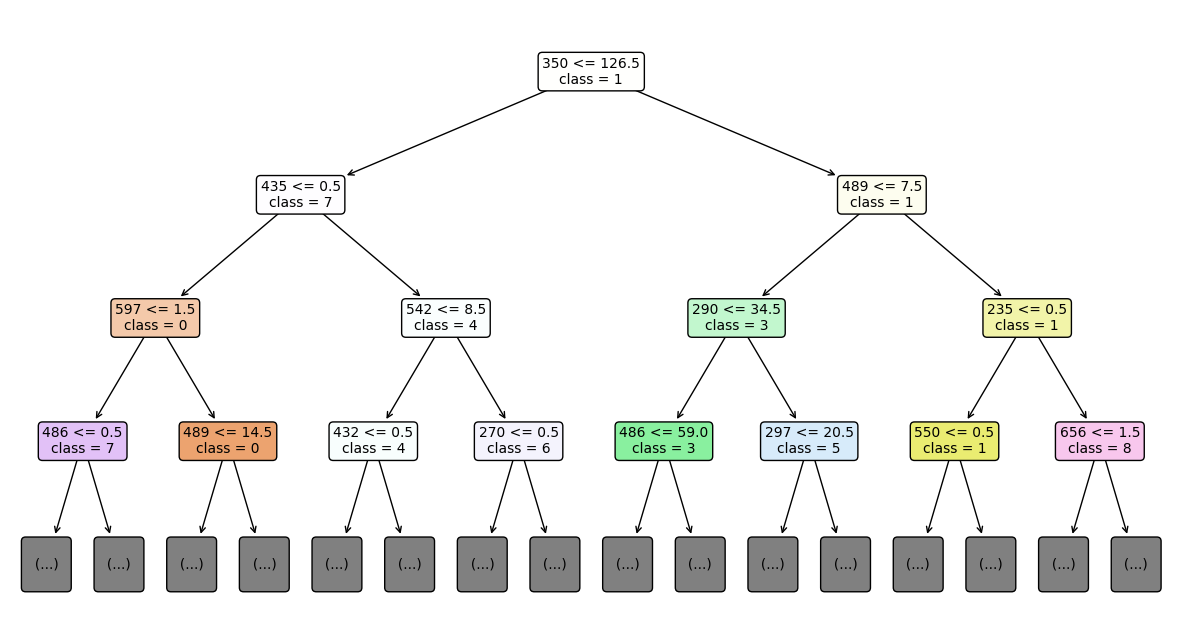

In [14]:
import matplotlib
import re
import numpy as np
from sklearn import tree

_, ax = plt.subplots(figsize=(15, 8))
_ = tree.plot_tree(model,
                   ax=ax,
                   feature_names=np.arange(784),
                   class_names=model.classes_,
                   max_depth=3, impurity=False,
                   label='all', filled=True, fontsize=10, rounded=True)


# kleine hack om de tekst van de nodes te veranderen, want dat kan niet met de plot_tree functie
def replace_text(obj):
    if type(obj) == matplotlib.text.Annotation:
        txt = obj.get_text()
        txt = re.sub("\nsamples[^$]*class", "\nclass", txt)
        obj.set_text(txt)
    return obj


ax.properties()['children'] = [replace_text(i) for i in ax.properties()['children']]

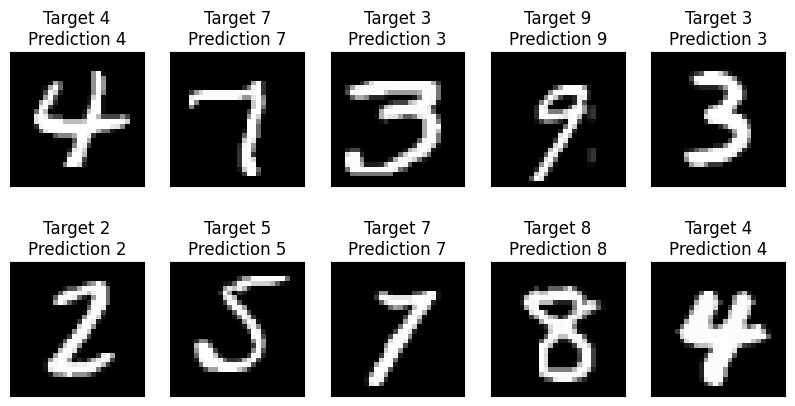

In [15]:
# predict the test data
y_pred = model.predict(X_test)

# plot prediction vs actual
fig, axes = plt.subplots(2, 5, figsize=(10, 5), subplot_kw={'xticks': (), 'yticks': ()})

for ax, X, y, y_pred in zip(axes.ravel(), X_test.head(10).to_numpy(), y_test.head(10), y_pred[:10]):
    ax.imshow(X.reshape(28, 28), cmap=plt.cm.gray)
    ax.set_title(f'Target {y}\nPrediction {y_pred}')


In [16]:
print(f'Train accuracy: {model.score(X_train, y_train)}')
print(f'Real Accuracy: {model.score(X_test, y_test)}')

Train accuracy: 0.994625
Real Accuracy: 0.8759285714285714
